In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [56]:
#imports dataset
df = pd.read_csv("H:\\bank-full.csv")

In [94]:
X = df[["age", "job", "marital", "education", "default", "housing", "loan", "poutcome"]]
Y = df['y']

In [93]:
X_encoded = pd.get_dummies(X, columns=['job', "marital", "education", "default", "housing", "loan", "poutcome"])
X_encoded.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,47,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,33,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [92]:
y_encoders = LabelEncoder()
target = pd.DataFrame()
target['y'] = y_encoders.fit_transform(df['y'])
target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [91]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [96]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state=42)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [97]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


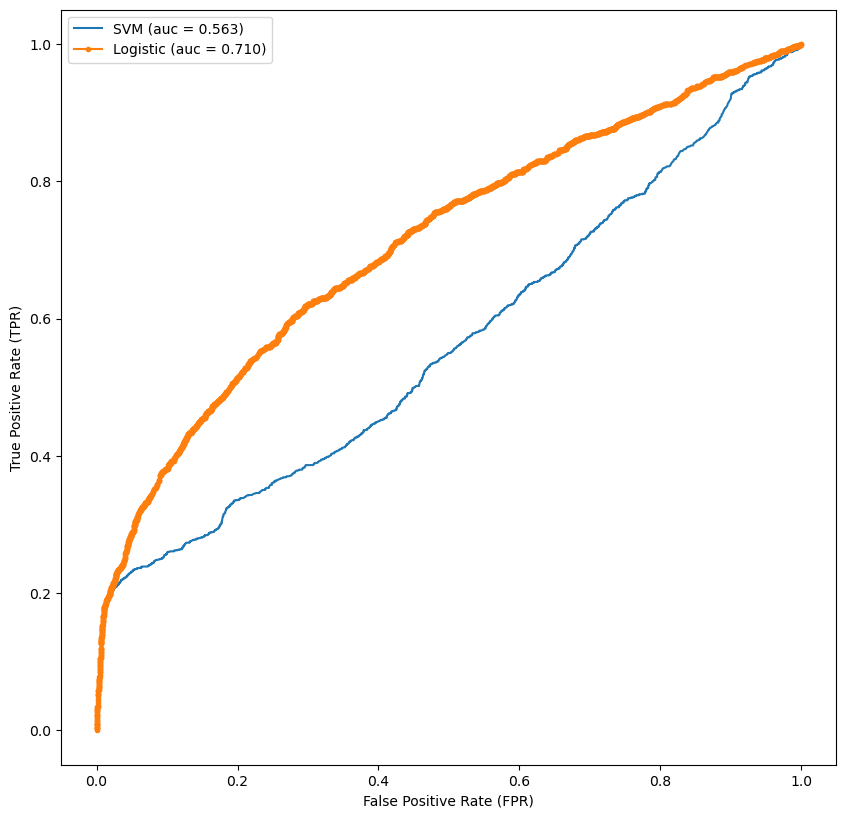

In [104]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(10,10), dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker= '.', label="Logistic (auc = %0.3f)" % auc_logistic)

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

plt.legend()

plt.show()